# (Interactive) Plotting using Matplotlib and Seaborn

[Matplotlib](http://matplotlib.org) is basic plotting library for Python inspired by Matlab. [Seaborn](http://stanford.edu/~mwaskom/software/seaborn) is built on top of it with integrated analysis and specialized plots + pretty good integration with Pandas

Also see [the full gallery of Seaborn](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html) or [Matplotlib](http://matplotlib.org/gallery.html).


In [1]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
#use a standard dataset of heterogenous data
cars = pd.read_csv('data/mtcars.csv')
cars.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


## Scatterplot

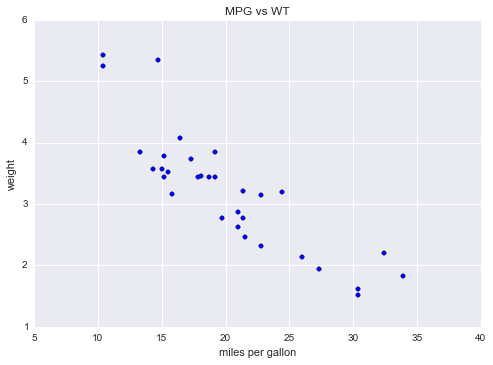

In [3]:
plt.scatter(x=cars['mpg'],y=cars['wt'])
plt.xlabel('miles per gallon')
plt.ylabel('weight')
plt.title('MPG vs WT')
plt.show()

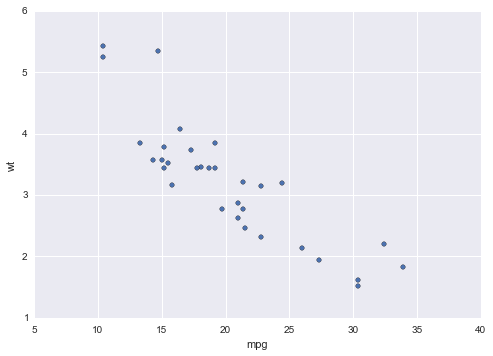

In [4]:
#integrated in pandas, too
cars.plot(x='mpg',y='wt',kind='scatter')

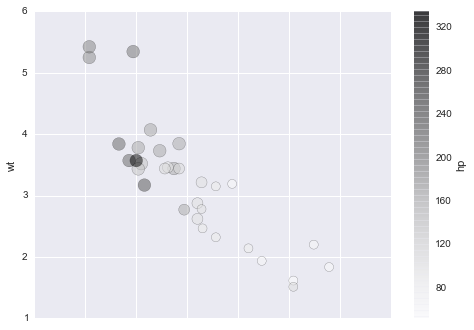

In [5]:
cars.plot(kind='scatter', x='mpg',y='wt',c='hp',s=cars['cyl']*20,alpha=0.5)

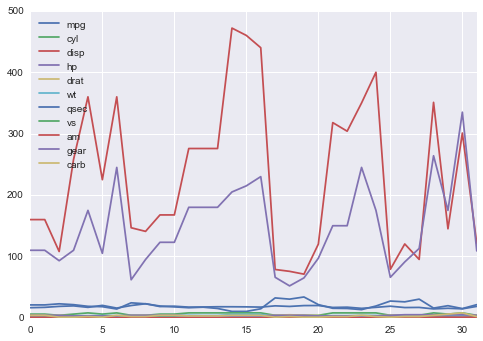

In [6]:
#what if we plot everything?
cars.plot()

## Histogram

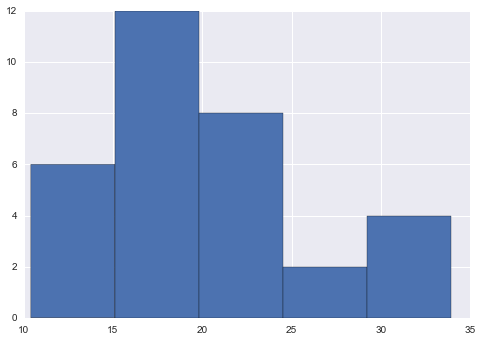

In [7]:
cars['mpg'].hist(bins=5)

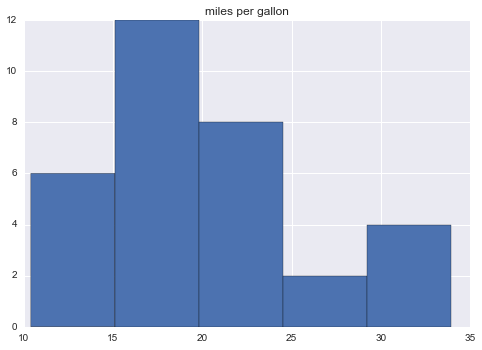

In [8]:
plt.hist(cars['mpg'],bins=5)
plt.title('miles per gallon')

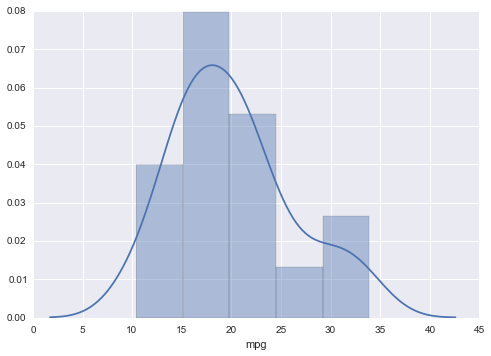

In [9]:
#seaborn not just a histogram but also an kernel density enstimation and better default settings
sns.distplot(cars['mpg'],bins=5)

# Box Plots

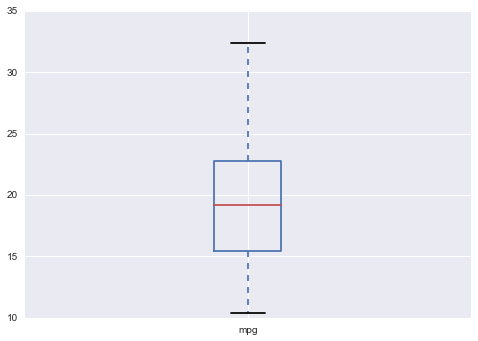

In [10]:
#box plots
cars['mpg'].plot(kind='box')

{'boxes': [<matplotlib.lines.Line2D at 0xa7081d0>],
 'caps': [<matplotlib.lines.Line2D at 0xa70eb70>,
 'fliers': [<matplotlib.lines.Line2D at 0xa713d30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xa7135f8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xa708b70>,
  <matplotlib.lines.Line2D at 0xa708dd8>]}

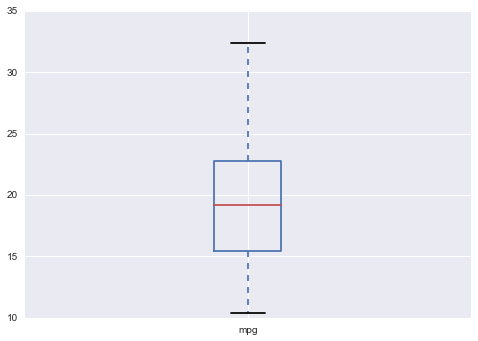

In [11]:
cars.boxplot('mpg')

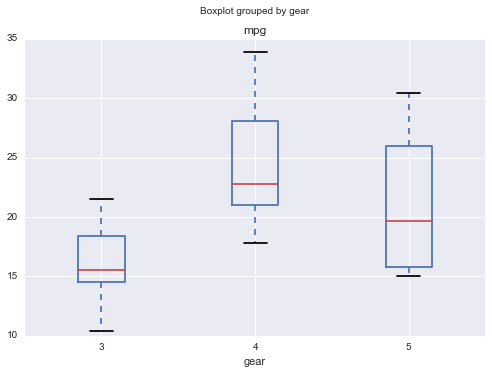

In [12]:
#group by gear
cars.boxplot('mpg', by='gear')

In [13]:
# load gapminder again and select 2007
gap = pd.read_csv('data/gapminder-unfiltered.tsv',index_col=0, sep='\t')
gap2007 = gap[gap.year == 2007]
gap2007.columns

Index(['continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

## Log Scale

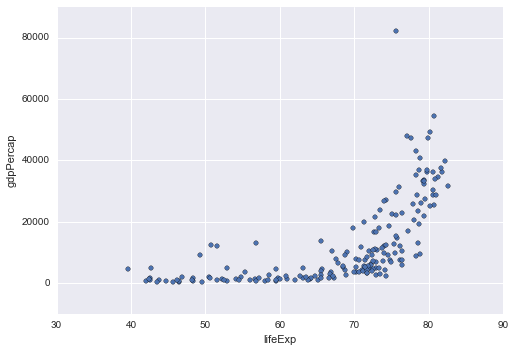

In [14]:
gap2007.plot(kind='scatter', x='lifeExp',y='gdpPercap')

unbalanced with outliers what about log scale?

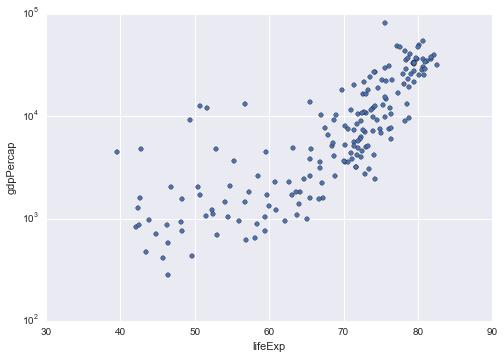

In [15]:
gap2007.plot(kind='scatter', x='lifeExp',y='gdpPercap')
plt.yscale('log')

## Grouping / Coloring Plots

grouped by color?

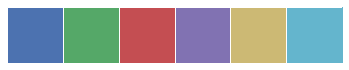

In [16]:
#create a color palette
colors = sns.color_palette()
sns.palplot(colors)

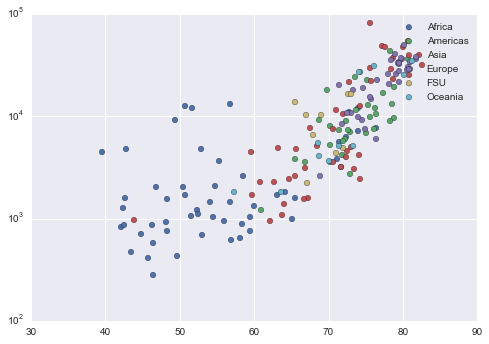

In [17]:
#for each group create an own plot an overlay them
for (name, group),color in zip(gap2007.groupby('continent'),colors):
    plt.scatter(x=group['lifeExp'],y=group['gdpPercap'],label=name, c=color,s=30)
plt.yscale('log')
plt.legend()

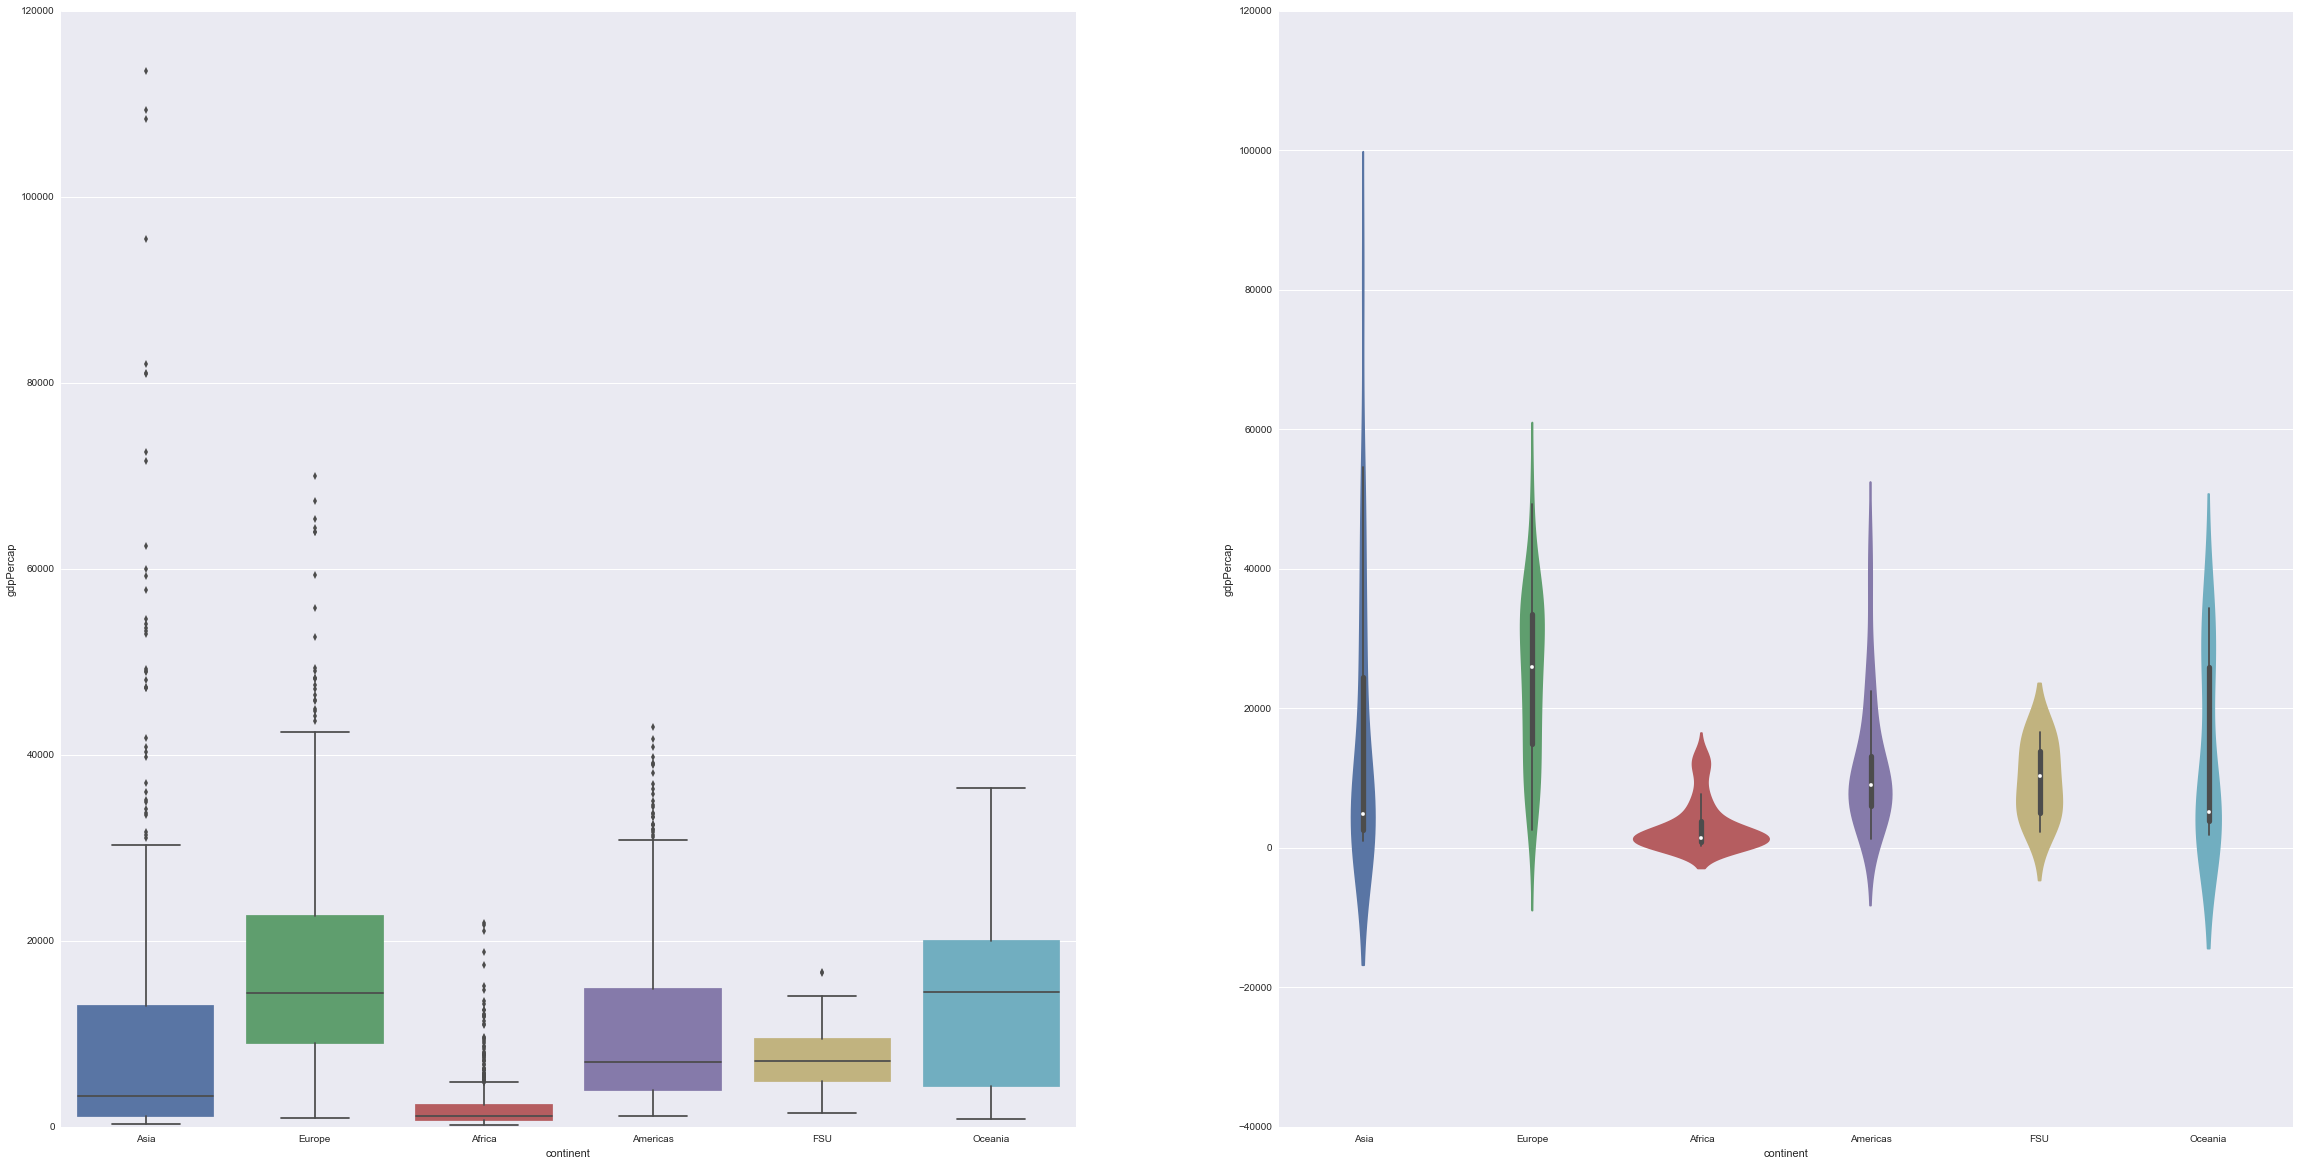

In [18]:
#playing with categories ... seaborn is pretty good with it
plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='continent',y='gdpPercap',data=gap)

plt.subplot(122)
sns.violinplot(x='continent',y='gdpPercap',data=gap2007)

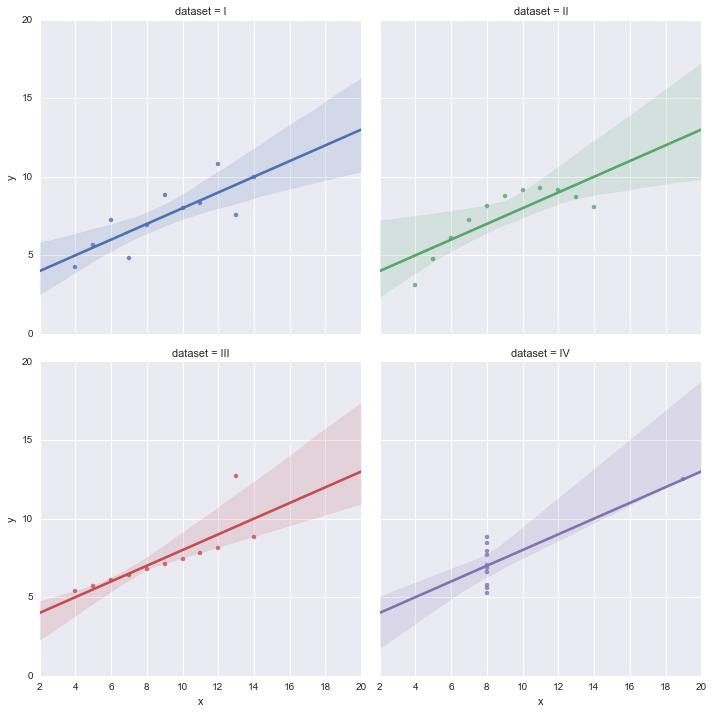

In [19]:
# or with linear regression

anscombe = sns.load_dataset("anscombe")
sns.lmplot('x','y',col='dataset',hue='dataset', data=anscombe, col_wrap=2)
#g = sns.FacetGrid(anscombe, col="dataset", size=4, aspect=1)
#g.map(sns.regplot, "x", "y")

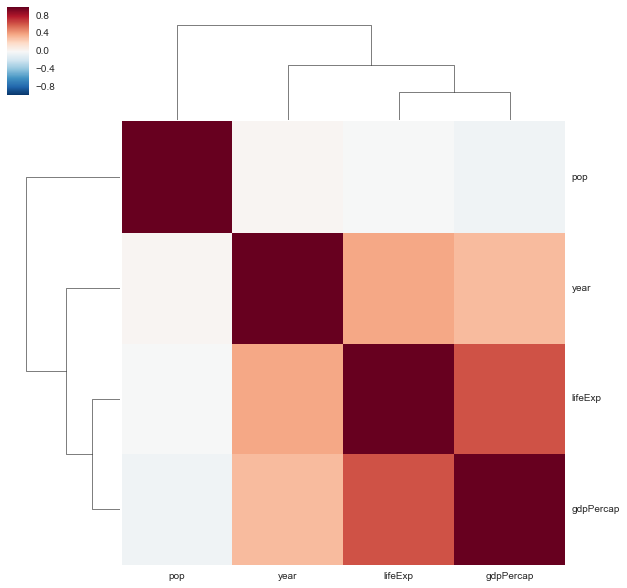

In [20]:
# or with structured heatmaps
# copied from 
#compute the distances and take a look at them
corrmat = gap.corr()

# draw a clustered heatmap using seaborn
sns.clustermap(corrmat, square=True)

## TASK
> create a scatterplot where 
> * x = lifeExp 
> * y = gdpPerCap
> * color = continent
> * size = pop 
>
> label the axis appropiately and use a log scale for gdp

In [ ]:
#your code

## Interactive plots

simple interaction is possible with IPython by default. That means whenever the user changes some parameter the visualization is recreated on the server side and send to the client. 

In [21]:
from IPython.html.widgets import interact, interact_manual

In [22]:
@interact(text='Hello', slider=(0,10),check=True,categories=['red','green','blue'])
def react(text, slider,check,categories):
    print(text,slider*10,check,categories)

Hello 50 True red


In [23]:
@interact_manual(text='Hello', slider=(0,10),check=True,categories=['red','green','blue'])
def react(text, slider,check,categories):
    print(text,slider*10,check,categories)

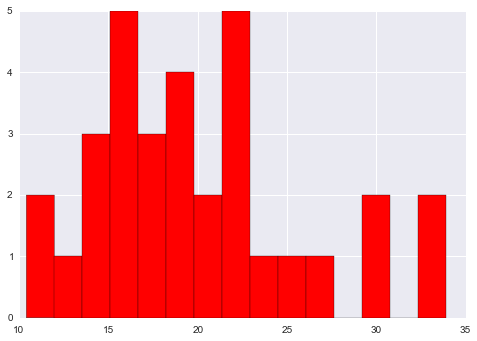

In [24]:
@interact(bins=(5, 25, 5),color=['red','green','orange','blue'])
def show_distplot(bins,color):
    cars['mpg'].hist(bins=bins, color=color)

# custom build widgets:

http://nbviewer.ipython.org/github/ipython/ipython/blob/3.x/examples/Interactive%20Widgets/Widget%20List.ipynb 

In [25]:
#hard core

from IPython.html import widgets

[widget for widget in dir(widgets) if not widget.endswith('Widget') and widget[0] == widget[0].upper() and widget[0] != '_']

['Accordion',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'CallbackDispatcher',
 'Checkbox',
 'Color',
 'Dropdown',
 'FlexBox',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'HBox',
 'HTML',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Latex',
 'Output',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'VBox']

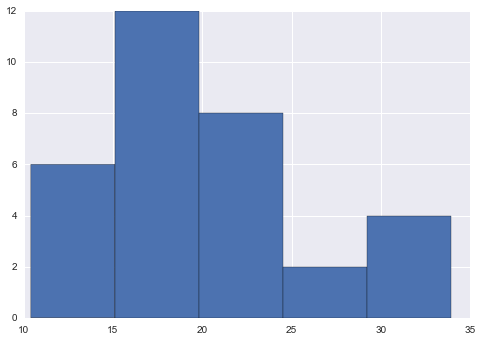

In [26]:
@interact(bins=widgets.FloatTextWidget(value=5))
def show_distplot(bins):
    cars['mpg'].hist(bins=bins)

In [27]:
text_widget = widgets.Textarea(value='Hello', description='text area')
slider_widget = widgets.BoundedFloatText(5,min=0,max=10, description='slider area')
check_widget = widgets.Checkbox(True,description="CheckboxWidget")
toggle = widgets.RadioButtons(options=['red','green','blue'], description="RadioButtonsWidget")

@interact(text=text_widget, slider=slider_widget,check=check_widget,categories=toggle)
def react(text, slider,check,categories):
    print(text,slider*10,check,categories)

Hello 50.0 True red


In [28]:
b = widgets.Button(description="Update")
checkbox = widgets.Checkbox(description="CheckboxWidget")

tab1_children = [b,
                 checkbox,
                 widgets.Dropdown(options=['A','B'], description="DropdownWidget"),
                 widgets.RadioButtons(options=['A','B'], description="RadioButtonsWidget"),
                 widgets.Select(options=['A','B'], description="SelectWidget"),
                 widgets.Text(description="TextWidget"),
                 widgets.Textarea(description="TextareaWidget"),
                 widgets.ToggleButton(description="ToggleButtonWidget"),
                 widgets.ToggleButtons(options=["Value 1", "Value2"], description="ToggleButtonsWidget"),
                 ]

tab2_children = [widgets.BoundedFloatText(description="BoundedFloatTextWidget"),
                 widgets.BoundedIntText(description="BoundedIntTextWidget"),
                 widgets.FloatSlider(description="FloatSliderWidget"),
                 widgets.FloatText(description="FloatTextWidget"),
                 widgets.IntSlider(description="IntSliderWidget"),
                 widgets.IntText(description="IntTextWidget"),
                 ]

tab1 = widgets.Box(children=tab1_children)
tab2 = widgets.Box(children=tab2_children)


i = widgets.Accordion(children=[tab1, tab2])

i.set_title(0,"Basic Widgets")
i.set_title(1,"Numbers Input")

from IPython.display import display

def button_clicked(bb):
    print(checkbox.value)
    #TODO update plot

b.on_click(button_clicked)

display(i)

## TASK
> make the plot from before interactive, such that you can slide the year

In [29]:
#your code

## Next

[Machine Learning using Scikit Learn](04_MachineLearning.ipynb)